In [1]:
# Import necessary libraries.
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read the dataset and display the header. It contains transactions from 01/12/2010 and 09/12/2011.
df = pd.read_csv('.\data\Online_Retail.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,1/12/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,1/12/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,1/12/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,1/12/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,1/12/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
# Display the footer of the dataset.
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,9/12/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,9/12/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,9/12/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,9/12/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,9/12/2011 12:50,4.95,12680.0,France


**Data Cleaning**

In [4]:
# Display shape of the dataset (number of rows and columns).
df.shape

(541909, 8)

In [5]:
# Display CustomerID distribution by country.
country_cust_data=df[['Country','CustomerID']].drop_duplicates()
country_cust_data.groupby(['Country'])['CustomerID'].aggregate('count').reset_index().sort_values('CustomerID', ascending=False)

,Country,CustomerID
36,United Kingdom,3950
14,Germany,95
13,France,87
31,Spain,31
3,Belgium,25
33,Switzerland,21
27,Portugal,19
19,Italy,15
12,Finland,12
1,Austria,11


In [6]:
# Select data from the United Kingdom.
df = df.query("Country=='United Kingdom'").reset_index(drop=True)

In [7]:
# Check any missing values in the dataset.
df.isnull().sum(axis=0)

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133600
Country             0
dtype: int64

In [8]:
# Remove missing values from the CustomerID column. We can ignore missing values in the description column for 
# RFM/K-Means modeling.
df = df[pd.notnull(df['CustomerID'])]

# Check any negative values in the Quantity column.
df.Quantity.min()

-80995

In [9]:
# Check any negative values in the UnitPrice column
df.UnitPrice.min()

0.0

In [10]:
# Filter out records with negative values in the Quantity column.
df = df[(df['Quantity']>0)]

In [11]:
# Convert the string data type column InvoiceDate to datetime.
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [12]:
# Add a new column for TotalAmount (Total Purchase Amount).
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']

In [13]:
# Display shape of the dataset (number of rows and columns) after dataset is cleaned.
df.shape

(354345, 9)

In [14]:
# Display the header of the dataset.
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34


In [15]:
# Display the footer of the dataset.
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
495473,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-09-12 12:31:00,1.95,15804.0,United Kingdom,23.4
495474,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-09-12 12:49:00,2.95,13113.0,United Kingdom,23.6
495475,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-09-12 12:49:00,1.25,13113.0,United Kingdom,30.0
495476,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-09-12 12:49:00,8.95,13113.0,United Kingdom,214.8
495477,581586,20685,DOORMAT RED RETROSPOT,10,2011-09-12 12:49:00,7.08,13113.0,United Kingdom,70.8


**RFM Modelling**

In [16]:
# Import necessary libraries.
import datetime as dt
import seaborn as sns
import chart_studio as cs
import plotly.offline as po
import plotly.graph_objs as gobj

In [17]:
NOW = dt.date(2011,12,10) 
df['Date'] = pd.DatetimeIndex(df.InvoiceDate).date

In [18]:
# Create Recency column.
df_recency = df.groupby(['CustomerID'],as_index=False)['Date'].max()
df_recency.columns = ['CustomerID','Last_Purchase_Date']

df_recency['Recency'] = df_recency.Last_Purchase_Date.apply(lambda x:(NOW - x).days)
df_recency.drop(columns=['Last_Purchase_Date'],inplace=True)
df_recency.head()

,CustomerID,Recency
0,12346.0,326
1,12747.0,23
2,12748.0,5
3,12749.0,23
4,12820.0,45


In [19]:
# Create Frequency and Monetary columns.
FM_Table = df.groupby('CustomerID').agg({'InvoiceNo'   : lambda x:len(x),
                                         'TotalAmount'  : lambda x:x.sum()})
FM_Table.rename(columns = {'InvoiceNo' :'Frequency',
                           'TotalAmount':'Monetary'},inplace= True)
FM_Table.head()

,Frequency,Monetary
CustomerID,,
12346.0,1,77183.60
12747.0,103,4196.01
12748.0,4596,33719.73
12749.0,199,4090.88
12820.0,59,942.34


In [20]:
# Create Recency, Frequency and Monetary with CustomerID.
RFM_Table = df_recency.merge(FM_Table,left_on='CustomerID',right_on='CustomerID')
RFM_Table.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12747.0,23,103,4196.01
2,12748.0,5,4596,33719.73
3,12749.0,23,199,4090.88
4,12820.0,45,59,942.34


In [21]:
# Descriptive Statistics (Recency).
RFM_Table.Recency.describe()

count    3921.000000
mean      105.586585
std       115.044919
min         0.000000
25%        22.000000
50%        61.000000
75%       162.000000
max       697.000000
Name: Recency, dtype: float64

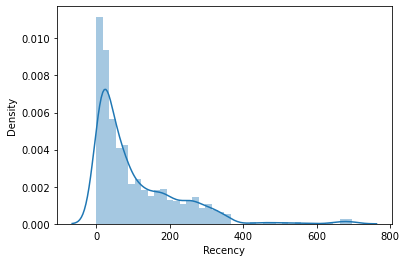

In [22]:
# Recency distribution plot, taking observations which have frequency less than 700.
x = RFM_Table.query('Recency < 700')['Recency']

ax = sns.distplot(x)

In [23]:
# Descriptive Statistics (Frequency).
RFM_Table.Frequency.describe()

count    3921.000000
mean       90.371079
std       217.796155
min         1.000000
25%        17.000000
50%        41.000000
75%        99.000000
max      7847.000000
Name: Frequency, dtype: float64

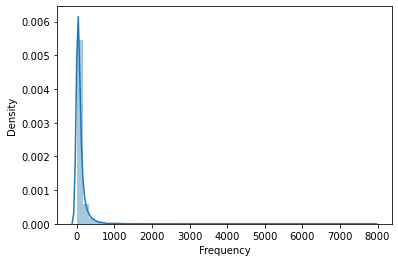

In [24]:
# Frequency distribution plot, taking observations which have frequency less than 8000.
x = RFM_Table.query('Frequency < 8000')['Frequency']

ax = sns.distplot(x)

In [25]:
# Descriptive Statistics (Monetary).
RFM_Table.Monetary.describe()

count      3921.000000
mean       1863.910113
std        7481.922217
min           0.000000
25%         300.040000
50%         651.820000
75%        1575.890000
max      259657.300000
Name: Monetary, dtype: float64

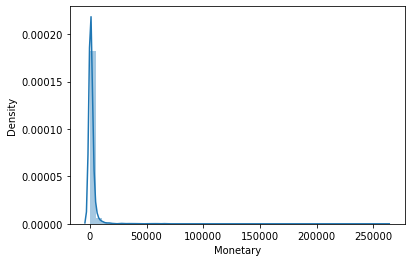

In [26]:
# Monateray distribution plot, taking observations which have monetary value less than 260000.
x = RFM_Table.query('Monetary < 260000')['Monetary']

ax = sns.distplot(x)

In [27]:
# Split into four segments using quantiles.
quantiles = RFM_Table.quantile(q=[0.25,0.50,0.75])
quantiles = quantiles.to_dict()

In [28]:
# Display the quantiles of Recency, Frequency, and Monetary.
quantiles

{'CustomerID': {0.25: 14208.0, 0.5: 15569.0, 0.75: 16913.0},
 'Recency': {0.25: 22.0, 0.5: 61.0, 0.75: 162.0},
 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 99.0},
 'Monetary': {0.25: 300.03999999999996, 0.5: 651.8199999999999, 0.75: 1575.89}}

In [29]:
segmented_rfm = RFM_Table.copy()

In [30]:
# Functions to create R, F and M segments.
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [31]:
segmented_rfm['R_quartile'] = segmented_rfm['Recency'].apply(RScore, args=('Recency',quantiles))
segmented_rfm['F_quartile'] = segmented_rfm['Frequency'].apply(FMScore, args=('Frequency',quantiles))
segmented_rfm['M_quartile'] = segmented_rfm['Monetary'].apply(FMScore, args=('Monetary',quantiles))
segmented_rfm.head()

,CustomerID,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile
0,12346.0,326,1,77183.60,4,4,1
1,12747.0,23,103,4196.01,2,1,1
2,12748.0,5,4596,33719.73,1,1,1
3,12749.0,23,199,4090.88,2,1,1
4,12820.0,45,59,942.34,2,2,2


In [32]:
# Calculate and add RFM_Segment value column showing combined concatenated score of RFM.
segmented_rfm['RFM_Segment'] = segmented_rfm.R_quartile.map(str)+segmented_rfm.F_quartile.map(str)+\
                            segmented_rfm.M_quartile.map(str)

In [33]:
segmented_rfm.head()

,CustomerID,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,RFM_Segment
0,12346.0,326,1,77183.60,4,4,1,441
1,12747.0,23,103,4196.01,2,1,1,211
2,12748.0,5,4596,33719.73,1,1,1,111
3,12749.0,23,199,4090.88,2,1,1,211
4,12820.0,45,59,942.34,2,2,2,222


In [34]:
# Calculate and add RFM_Score value column showing total sum of RFM_Segment values.
segmented_rfm['RFM_Score'] = segmented_rfm[['R_quartile','F_quartile','M_quartile']].sum(axis=1)

In [35]:
segmented_rfm.head()

,CustomerID,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,RFM_Segment,RFM_Score
0,12346.0,326,1,77183.60,4,4,1,441,9
1,12747.0,23,103,4196.01,2,1,1,211,4
2,12748.0,5,4596,33719.73,1,1,1,111,3
3,12749.0,23,199,4090.88,2,1,1,211,4
4,12820.0,45,59,942.34,2,2,2,222,6


In [36]:
# Display the unique number of RFMScore.
segmented_rfm['RFM_Score'].unique()

array([ 9,  4,  3,  6, 11,  7,  8, 12, 10,  5], dtype=int64)

In [37]:
# Display the distribution of RFM_Score.
segmented_rfm.groupby('RFM_Score').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count'] }).round(1)

Recency Frequency Monetary      
             mean      mean     mean count
RFM_Score                                 
3            10.3     368.6   8102.0   366
4            25.7     190.7   4123.0   382
5            41.3     123.7   1875.6   398
6            57.2      78.4   1416.3   367
7            70.5      55.0   1017.7   427
8            96.6      39.1   1296.7   376
9           116.4      28.3    636.9   442
10          169.0      21.4    347.8   486
11          198.6      14.0    228.7   354
12          287.1       7.8    149.3   323

In [38]:
# Validate the data for RFMGroup = 111.
segmented_rfm[segmented_rfm['RFM_Segment']=='111'].sort_values('Monetary', ascending=False).reset_index().head(10)

,index,CustomerID,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,RFM_Segment,RFM_Score
0,3784,18102.0,12,431,259657.30,1,1,1,111,3
1,3315,17450.0,3,337,194550.79,1,1,1,111,3
2,3357,17511.0,6,963,91062.38,1,1,1,111,3
3,2767,16684.0,12,277,66653.56,1,1,1,111,3
4,903,14096.0,12,5111,65164.79,1,1,1,111,3
5,1772,15311.0,0,2379,60767.90,1,1,1,111,3
6,191,13089.0,6,1818,58825.83,1,1,1,111,3
7,1580,15061.0,5,403,54534.14,1,1,1,111,3
8,898,14088.0,11,589,50491.81,1,1,1,111,3
9,3594,17841.0,0,7847,40991.57,1,1,1,111,3


In [39]:
# Validate the data for RFMGroup = 444.
segmented_rfm[segmented_rfm['RFM_Segment']=='444'].sort_values('Monetary', ascending=False).reset_index().head(10)

,index,CustomerID,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,RFM_Segment,RFM_Score
0,3483,17678.0,264,16,298.11,4,4,4,444,12
1,3375,17531.0,307,14,296.70,4,4,4,444,12
2,665,13751.0,289,9,296.25,4,4,4,444,12
3,2657,16526.0,172,15,290.36,4,4,4,444,12
4,3328,17464.0,247,9,289.96,4,4,4,444,12
5,2365,16125.0,516,13,289.35,4,4,4,444,12
6,2590,16432.0,183,8,287.40,4,4,4,444,12
7,3849,18190.0,193,15,284.46,4,4,4,444,12
8,3909,18270.0,267,11,283.15,4,4,4,444,12
9,259,13177.0,183,17,282.45,4,4,4,444,12


In [40]:
# Show different types of customer segments based on RFM score.
print("Best Customers: ",len(segmented_rfm[segmented_rfm['RFM_Segment']=='111']))
print('Loyal Customers: ',len(segmented_rfm[segmented_rfm['F_quartile']==1]))
print("Big Spenders: ",len(segmented_rfm[segmented_rfm['M_quartile']==1]))
print('Almost Lost: ', len(segmented_rfm[segmented_rfm['RFM_Segment']=='134']))
print('Lost Customers: ',len(segmented_rfm[segmented_rfm['RFM_Segment']=='344']))
print('Lost Cheap Customers: ',len(segmented_rfm[segmented_rfm['RFM_Segment']=='444']))

Best Customers:  366
Loyal Customers:  980
Big Spenders:  980
Almost Lost:  26
Lost Customers:  170
Lost Cheap Customers:  323


In [41]:
# Import necessary libraries.
from scipy import stats
from feature_engine.outliers import Winsorizer
from scipy.spatial.distance import cdist
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [42]:
# Function to check skewness
def check_skew(df_skew, column):
    skew = stats.skew(df_skew[column])
    skewtest = stats.skewtest(df_skew[column])
    plt.title('Distribution of ' + column)
    sns.distplot(df_skew[column])
    print("{}'s: Skew: {}, : {}".format(column, skew, skewtest))
    return

Recency's: Skew: 1.9232630078260136, : SkewtestResult(statistic=33.336649395599316, pvalue=1.1373882240222696e-243)
Frequency's: Skew: 18.662015317482382, : SkewtestResult(statistic=80.11405921257308, pvalue=0.0)
Monetary's: Skew: 20.19301102927751, : SkewtestResult(statistic=81.76618091752813, pvalue=0.0)


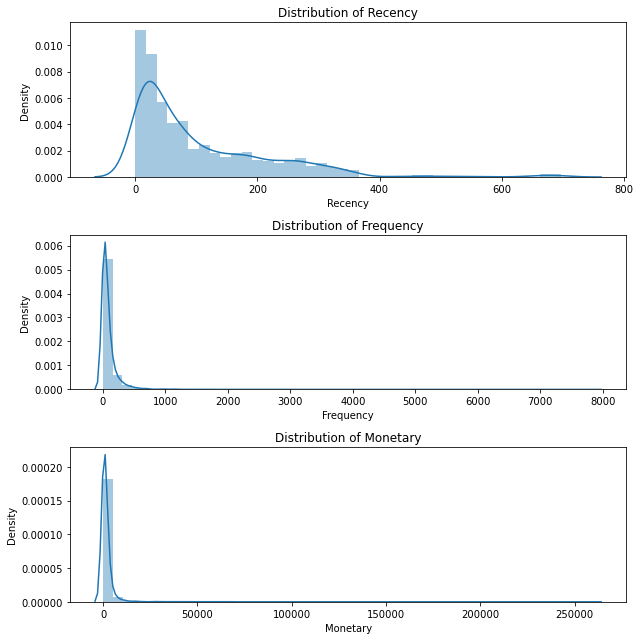

In [43]:
# Plot all 3 graphs together for summary findings.
plt.figure(figsize=(9, 9))

plt.subplot(3, 1, 1)
check_skew(RFM_Table,'Recency')

plt.subplot(3, 1, 2)
check_skew(RFM_Table,'Frequency')

plt.subplot(3, 1, 3)
check_skew(RFM_Table,'Monetary')

plt.tight_layout()

In [44]:
df_rfm_log = RFM_Table.copy()

In [45]:
df_rfm_log.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12747.0,23,103,4196.01
2,12748.0,5,4596,33719.73
3,12749.0,23,199,4090.88
4,12820.0,45,59,942.34


Recency's: Skew: -0.634807821162315, : SkewtestResult(statistic=-14.958069141347085, pvalue=1.3797132073793043e-50)
Frequency's: Skew: -0.02773073545771198, : SkewtestResult(statistic=-0.7101127795558876, pvalue=0.47763420205764984)
Monetary's: Skew: 0.33277933053668907, : SkewtestResult(statistic=8.304523213848686, pvalue=1.0022107331622487e-16)


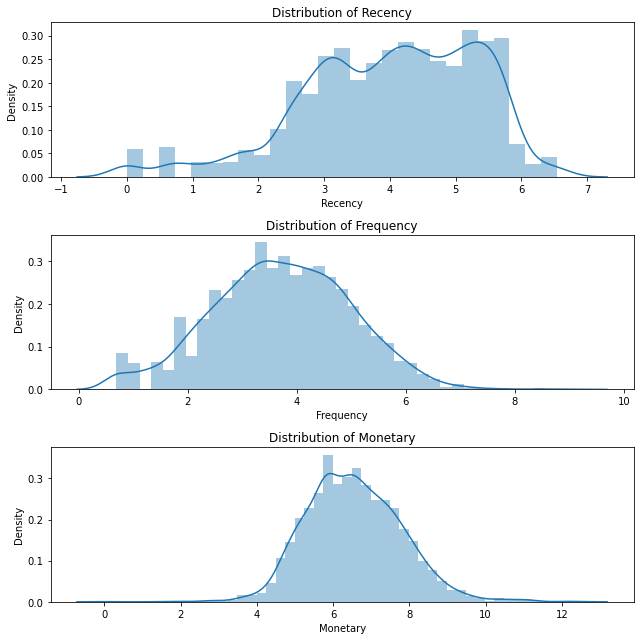

In [46]:
df_rfm_log = np.log(df_rfm_log+1)

plt.figure(figsize=(9, 9))

plt.subplot(3, 1, 1)
check_skew(df_rfm_log,'Recency')

plt.subplot(3, 1, 2)
check_skew(df_rfm_log,'Frequency')
plt.subplot(3, 1, 3)
check_skew(df_rfm_log,'Monetary')

plt.tight_layout()

In [47]:
RFM_Table.describe()

,CustomerID,Recency,Frequency,Monetary
count,3921.000000,3921.000000,3921.000000,3921.000000
mean,15561.471563,105.586585,90.371079,1863.910113
std,1576.823683,115.044919,217.796155,7481.922217
min,12346.000000,0.000000,1.000000,0.000000
25%,14208.000000,22.000000,17.000000,300.040000
50%,15569.000000,61.000000,41.000000,651.820000
75%,16913.000000,162.000000,99.000000,1575.890000
max,18287.000000,697.000000,7847.000000,259657.300000


In [48]:
windsoriser = Winsorizer(tail='both', # cap left, right or both tails 
                          fold=2,
                           variables=[ 'Recency', 'Frequency', 'Monetary']
                        )
windsoriser.fit(df_rfm_log)

Winsorizer(fold=2, tail='both', variables=['Recency', 'Frequency', 'Monetary'])

In [49]:
df_rfm_log = windsoriser.transform(df_rfm_log)

In [50]:
scaler = StandardScaler()

scaler.fit(df_rfm_log)

RFM_Table_scaled = scaler.transform(df_rfm_log)

In [51]:
RFM_Table_scaled = pd.DataFrame(RFM_Table_scaled, columns=df_rfm_log.columns)
RFM_Table_scaled.head()

,CustomerID,Recency,Frequency,Monetary
0,-2.215813,1.410988,-2.075914,2.148546
1,-1.902816,-0.690758,0.758570,1.550754
2,-1.902048,-1.806280,2.073238,2.148546
3,-1.901280,-0.690758,1.296526,1.529032
4,-1.846897,-0.167244,0.306071,0.272614


In [52]:
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(RFM_Table_scaled) 
    kmeanModel.fit(RFM_Table_scaled)     
      
    distortions.append(sum(np.min(cdist(RFM_Table_scaled, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / RFM_Table_scaled.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(RFM_Table_scaled, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / RFM_Table_scaled.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

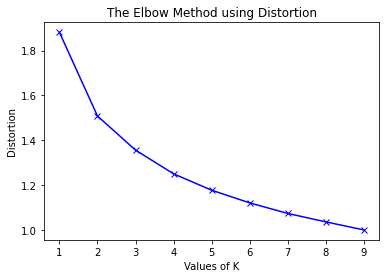

In [53]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

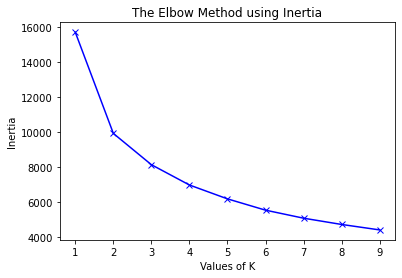

In [54]:
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show() 

In [55]:
def kmeans(normalised_df_rfm, clusters_number, original_df_rfm):
    
    kmeans = KMeans(n_clusters = clusters_number, random_state = 1)
    kmeans.fit(normalised_df_rfm)

    # Extract cluster labels
    cluster_labels = kmeans.labels_
        
    # Create a cluster label column in original dataset
    df_new = original_df_rfm.assign(Cluster = cluster_labels)
    
    # Initialise TSNE
    model = TSNE(random_state=1)
    transformed = model.fit_transform(df_new)
    
    # Plot t-SNE
    plt.title('Flattened Graph of {} Clusters'.format(clusters_number))
    sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue=cluster_labels, style=cluster_labels, palette="Set1")
    
    return df_new

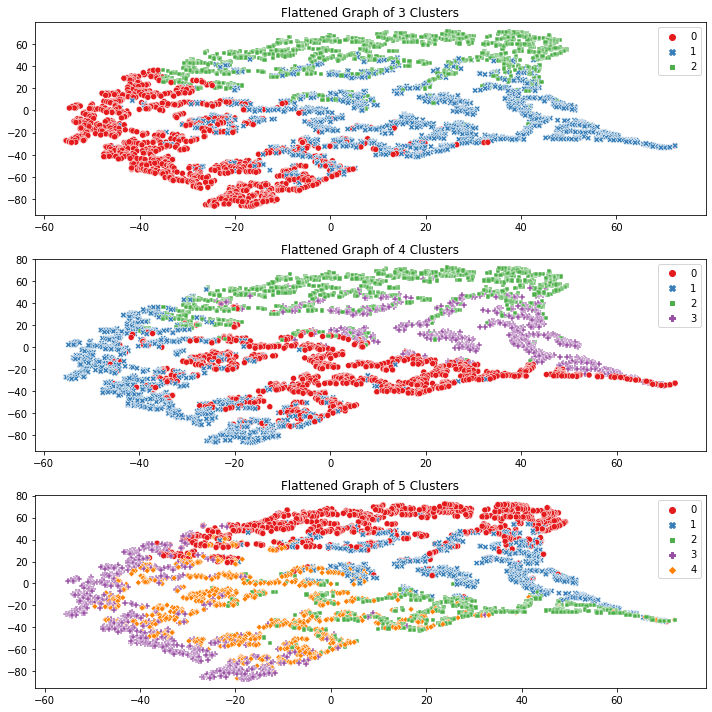

In [56]:
plt.figure(figsize=(10, 10))

plt.subplot(3, 1, 1)
df_rfm_k3 = kmeans(RFM_Table_scaled, 3, RFM_Table)

plt.subplot(3, 1, 2)
df_rfm_k4 = kmeans(RFM_Table_scaled, 4, RFM_Table)

plt.subplot(3, 1, 3)
df_rfm_k5 = kmeans(RFM_Table_scaled, 5, RFM_Table)

plt.tight_layout()

In [57]:
def snake_plot(normalised_df_rfm, df_rfm_kmeans, df_rfm_original):

    normalised_df_rfm = pd.DataFrame(normalised_df_rfm, 
                                       index=RFM_Table.index, 
                                       columns=RFM_Table.columns)
    normalised_df_rfm['Cluster'] = df_rfm_kmeans['Cluster']

    # Melt data into long format.
    df_melt = pd.melt(normalised_df_rfm.reset_index(), 
                        id_vars=['CustomerID', 'Cluster'],
                        value_vars=['Recency', 'Frequency', 'Monetary'], 
                        var_name='Metric', 
                        value_name='Value')

    plt.xlabel('Metric')
    plt.ylabel('Value')
    sns.pointplot(data=df_melt, x='Metric', y='Value', hue='Cluster')
    
    return

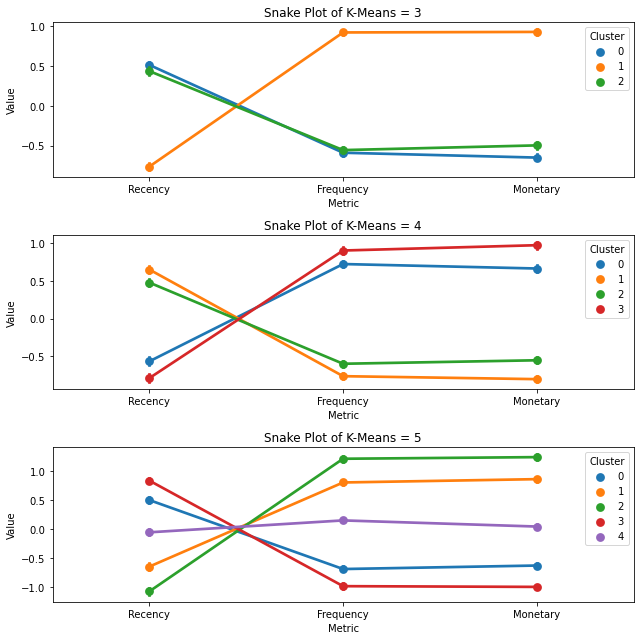

In [58]:
plt.figure(figsize=(9, 9))

plt.subplot(3, 1, 1)
plt.title('Snake Plot of K-Means = 3')
snake_plot(RFM_Table_scaled, df_rfm_k3, RFM_Table)

plt.subplot(3, 1, 2)
plt.title('Snake Plot of K-Means = 4')
snake_plot(RFM_Table_scaled, df_rfm_k4, RFM_Table)

plt.subplot(3, 1, 3)
plt.title('Snake Plot of K-Means = 5')
snake_plot(RFM_Table_scaled, df_rfm_k5, RFM_Table)

plt.tight_layout()

In [59]:
def rfm_values(df):

    df_new = df.groupby(['Cluster']).agg({
        'Recency': 'mean',
        'Frequency': 'mean',
        'Monetary': ['mean', 'count']
    }).round(0)
    
    return df_new

In [60]:
rfm_values(df_rfm_k4)

Recency Frequency Monetary      
           mean      mean     mean count
Cluster                                 
0          45.0     148.0   3225.0  1039
1         176.0      22.0    352.0  1054
2         147.0      26.0    584.0  1063
3          33.0     197.0   3877.0   765

**Observation from Clusters**
* Cluster 3 refers to the Best Loyal Customers. They spend a lot of money, revisit frequently, and make purchases recently.
* Cluster 1 refers to the Cheapest Customers. They spend less money, revisit seldomly, and long time haven't purchased.
* Cluster 0 refers to the Potential Growth Customer (to Best Loyal Customer). They tend to spend a lot of money, revisit frequently, and make purchases recently. Can do additional promotion (products/discounts with the volume of purchase) to attract them and make them become best loyal customers (expand the customer base of Best Loyal Customers).
* Cluster 2 refers to the Potential Lost Customer. They tend to spend less money, revisit seldomly, and long time haven't purchased. Can do additional promotions (coupons/discounts) to attract them to return.